# 1. 필요 라이브러리 가져오기

In [1]:
# 한글로 그래프 제목 입력해도 글씨 깨지지 않게 함
# 코드 실행후 런타임 다시 시작하기!!

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,443 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
# import koreanize_matplotlib
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=2.5)
plt.rc("font", family="NanumBarunGothic")
plt.rc("axes", unicode_minus=False)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# 2. 데이터셋 확인

In [22]:
df_train = pd.read_csv('/content/drive/MyDrive/data/감귤/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/data/감귤/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/data/감귤/sample_submission.csv')

In [ ]:
print(df_train.shape)
print(df_test.shape)

(2207, 184)
(2208, 183)


In [ ]:
df_train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [ ]:
df_test.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224


In [ ]:
print(df_train.columns)
print(df_test.columns)

Index(['ID', '착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균',
       '2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순',
       ...
       '2022-11-19 엽록소', '2022-11-20 엽록소', '2022-11-21 엽록소', '2022-11-22 엽록소',
       '2022-11-23 엽록소', '2022-11-24 엽록소', '2022-11-25 엽록소', '2022-11-26 엽록소',
       '2022-11-27 엽록소', '2022-11-28 엽록소'],
      dtype='object', length=184)
Index(['ID', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균', '2022-09-01 새순',
       '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순', '2022-09-05 새순',
       ...
       '2022-11-19 엽록소', '2022-11-20 엽록소', '2022-11-21 엽록소', '2022-11-22 엽록소',
       '2022-11-23 엽록소', '2022-11-24 엽록소', '2022-11-25 엽록소', '2022-11-26 엽록소',
       '2022-11-27 엽록소', '2022-11-28 엽록소'],
      dtype='object', length=183)


## 2.1 Null data check

In [ ]:
df_train.isnull().sum()

ID                0
착과량(int)          0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
                 ..
2022-11-24 엽록소    0
2022-11-25 엽록소    0
2022-11-26 엽록소    0
2022-11-27 엽록소    0
2022-11-28 엽록소    0
Length: 184, dtype: int64

In [ ]:
df_test.isnull().sum()

ID                0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
수관폭평균             0
                 ..
2022-11-24 엽록소    0
2022-11-25 엽록소    0
2022-11-26 엽록소    0
2022-11-27 엽록소    0
2022-11-28 엽록소    0
Length: 183, dtype: int64

In [ ]:
for col in df_train.columns:
    msg = '변수명: {:>10}\t NaN 값의 확률: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

변수명:         ID	 NaN 값의 확률: 0.00%
변수명:   착과량(int)	 NaN 값의 확률: 0.00%
변수명:      수고(m)	 NaN 값의 확률: 0.00%
변수명:  수관폭1(min)	 NaN 값의 확률: 0.00%
변수명:  수관폭2(max)	 NaN 값의 확률: 0.00%
변수명:      수관폭평균	 NaN 값의 확률: 0.00%
변수명: 2022-09-01 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-02 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-03 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-04 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-05 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-06 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-07 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-08 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-09 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-10 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-11 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-12 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-13 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-14 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-15 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-16 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-17 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-18 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-19 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-20 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-21 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-22 새순	

In [ ]:
for col in df_test.columns:
    msg = '변수명: {:>10}\t NaN 값의 확률: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

변수명:         ID	 NaN 값의 확률: 0.00%
변수명:      수고(m)	 NaN 값의 확률: 0.00%
변수명:  수관폭1(min)	 NaN 값의 확률: 0.00%
변수명:  수관폭2(max)	 NaN 값의 확률: 0.00%
변수명:      수관폭평균	 NaN 값의 확률: 0.00%
변수명: 2022-09-01 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-02 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-03 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-04 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-05 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-06 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-07 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-08 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-09 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-10 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-11 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-12 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-13 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-14 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-15 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-16 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-17 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-18 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-19 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-20 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-21 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-22 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-23 

* train, test 데이터 모두 null data가 없다.

## 2.2 Target label 확인

In [ ]:
df_train['착과량(int)'].sort_values()

798       1
1389      1
2156      1
1216      2
557       2
       ... 
1326    799
190     799
1983    799
1176    799
479     799
Name: 착과량(int), Length: 2207, dtype: int64

* 착과량은 최소1, 최대 799의 값을 가지고 있다.

Text(0.5, 1.0, '착과량 분포')

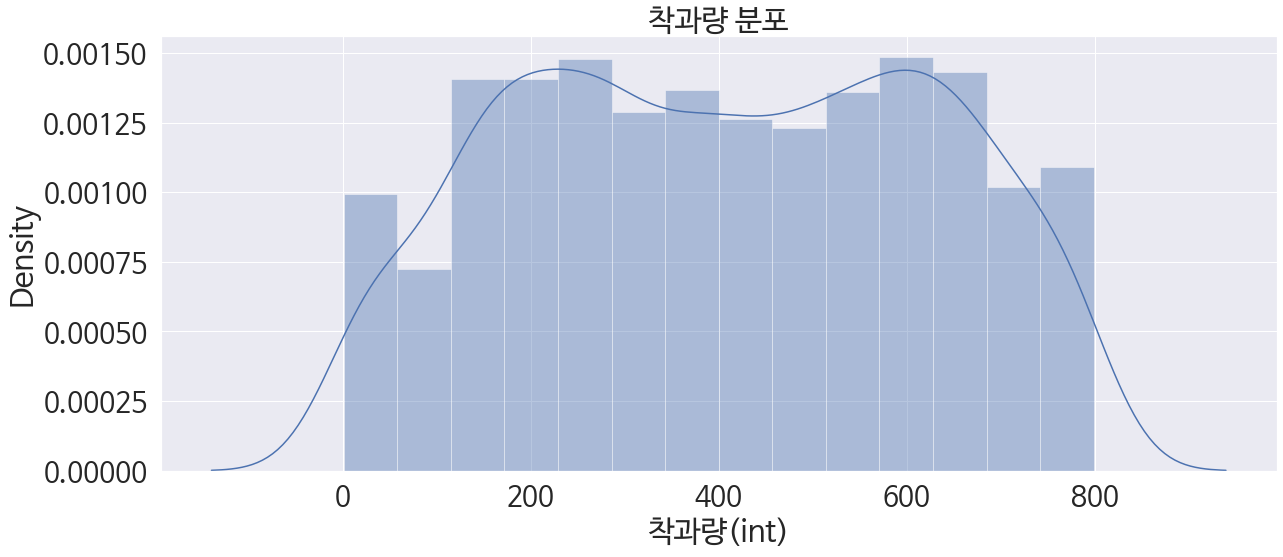

In [ ]:
plt.figure(figsize = (20,8))
sns.distplot(df_train['착과량(int)'])
plt.title('착과량 분포')

* 착과량은 250, 600 부근에 많이 분포되어 있다.

In [ ]:
print('최소 착과량 : {}'.format(df_train['착과량(int)'].min()))
print('최대 착과량 : {}'.format(df_train['착과량(int)'].max()))
print('평균 착과량 : {:.1f}'.format(df_train['착과량(int)'].mean()))

최소 착과량 : 1
최대 착과량 : 799
평균 착과량 : 406.2


# 3. EDA

## 3.1 수고

In [ ]:
df_train['수고(m)'].sort_values()

1033     95.0
1515    105.0
664     108.0
1756    108.0
851     113.0
        ...  
447     348.0
712     372.0
681     375.0
1985    376.0
2019    381.0
Name: 수고(m), Length: 2207, dtype: float64

In [ ]:
print('-- train 수고 데이터 --')
print('최소 수고 : {}'.format(df_train['수고(m)'].min()))
print('최대 수고 : {}'.format(df_train['수고(m)'].max()))
print('평균 수고 : {:.1f}'.format(df_train['수고(m)'].mean()))

-- train 수고 데이터 --
최소 수고 : 95.0
최대 수고 : 381.0
평균 수고 : 243.7


In [ ]:
df_test['수고(m)'].sort_values()

1218    102.0
1699    110.0
280     113.0
1879    117.0
1866    122.0
        ...  
49      354.0
2171    355.0
1194    364.0
382     384.0
783     438.0
Name: 수고(m), Length: 2208, dtype: float64

In [ ]:
print('-- test 수고 데이터 --')
print('최소 수고 : {}'.format(df_test['수고(m)'].min()))
print('최대 수고 : {}'.format(df_test['수고(m)'].max()))
print('평균 수고 : {:.1f}'.format(df_test['수고(m)'].mean()))

-- test 수고 데이터 --
최소 수고 : 102.0
최대 수고 : 438.0
평균 수고 : 244.2


* 최소와 최대 값은 조금 차이가 있었지만 평균 수고 값은 비슷하다.

Text(0.5, 1.0, '수고 분포')

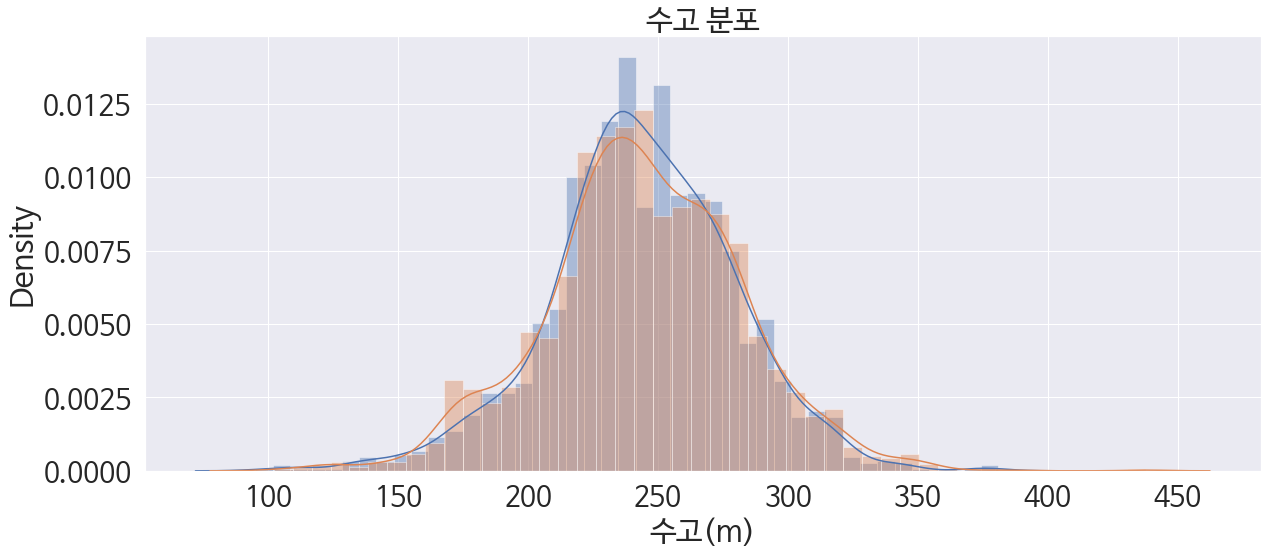

In [ ]:
plt.figure(figsize = (20,8))
sns.distplot(df_train['수고(m)'])
sns.distplot(df_test['수고(m)'])
plt.title('수고 분포')

Text(0.5, 1.0, '수고에 따른 착과량 분포')

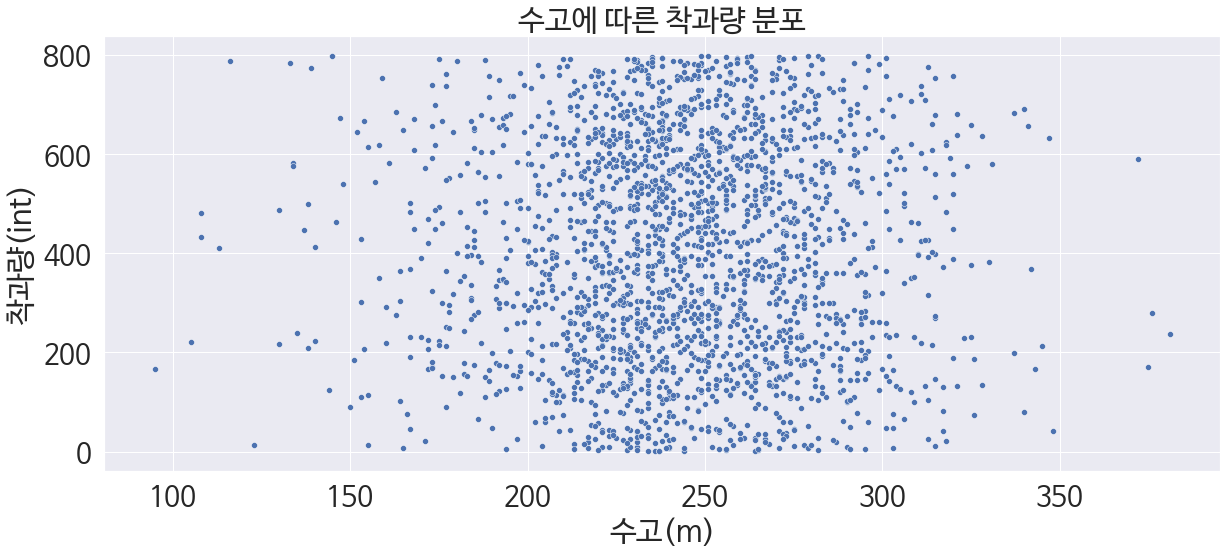

In [ ]:
plt.figure(figsize = (20,8))
sns.scatterplot(data = df_train, x = '수고(m)', y = '착과량(int)')
plt.title('수고에 따른 착과량 분포')

In [ ]:
df_train[df_train['수고(m)'] == 381]

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
2019,TRAIN_2019,237,381.0,371.0,421.0,396.0,4.3,4.2,4.2,4.1,...,66.134193,65.970818,65.912441,65.783585,65.643496,65.483779,65.427716,65.317918,65.242229,65.169636


In [ ]:
df_train[df_train['수고(m)'] == 95]

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
1033,TRAIN_1033,166,95.0,103.0,125.0,114.0,4.6,4.5,4.5,4.4,...,66.174794,66.1567,66.009987,65.954499,65.910957,65.783375,65.771257,65.755024,65.717033,65.517262


In [ ]:
df_train[df_train['수고(m)'] == 243].sort_values('착과량(int)')

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
1211,TRAIN_1211,147,243.0,257.0,259.0,258.0,4.6,4.5,4.5,4.4,...,70.361942,70.218515,70.211188,70.113066,70.075658,69.887819,69.866179,69.757246,69.616404,69.497934
1031,TRAIN_1031,200,243.0,333.0,349.0,341.0,4.4,4.4,4.3,4.3,...,66.939207,66.744067,66.589885,66.454817,66.360564,66.211655,66.084677,66.074761,66.012551,65.964740
2075,TRAIN_2075,224,243.0,338.0,375.0,356.5,4.4,4.3,4.3,4.2,...,64.204074,64.138250,64.103605,64.009774,63.872838,63.745745,63.661264,63.545413,63.422793,63.271334
60,TRAIN_0060,286,243.0,249.0,398.0,323.5,4.4,4.3,4.3,4.2,...,59.156574,59.000957,58.929313,58.771963,58.654622,58.537724,58.490578,58.431229,58.408920,58.213015
1697,TRAIN_1697,292,243.0,436.0,537.0,486.5,4.4,4.3,4.3,4.2,...,63.539597,63.341498,63.291276,63.270935,63.171452,63.152991,63.142607,63.132097,62.997946,62.891298
132,TRAIN_0132,330,243.0,275.0,358.0,316.5,4.1,4.0,4.0,4.0,...,67.878138,67.802457,67.787971,67.691495,67.555363,67.512759,67.426749,67.346481,67.237614,67.163483
1125,TRAIN_1125,365,243.0,271.0,283.0,277.0,3.9,3.8,3.8,3.8,...,65.870748,65.822410,65.781543,65.659507,65.578849,65.494228,65.368300,65.246983,65.201975,65.197441
1174,TRAIN_1174,375,243.0,378.0,424.0,401.0,3.9,3.8,3.8,3.8,...,68.878196,68.792856,68.694908,68.679695,68.675795,68.611524,68.604867,68.452012,68.308096,68.108535
270,TRAIN_0270,387,243.0,316.0,327.0,321.5,4.1,4.1,4.0,4.0,...,65.969885,65.942053,65.868153,65.723441,65.677756,65.505031,65.426203,65.232325,65.228377,65.044881
313,TRAIN_0313,437,243.0,315.0,362.0,338.5,3.6,3.6,3.6,3.5,...,64.197610,64.179608,63.984559,63.924790,63.741447,63.722580,63.583875,63.449141,63.447341,63.325025


* 수고가 최대값(381)일 때의 착과량은 237이고 수고가 최소값(95)일 때의 착과량은 166이다.
* 평균 수고값(약 243)일 때의 착과량 최소 147 최대 788이다.
* 특별한 상관관계는 없어보인다. 

## 3.2 수관폭

In [ ]:
print(df_train['수관폭1(min)'].sort_values())
print('------------------------------------')
print(df_train['수관폭2(max)'].sort_values())
print('------------------------------------')
print(df_train['수관폭평균'].sort_values())

913      95.0
1033    103.0
1756    104.0
2059    116.0
1485    124.0
        ...  
1506    518.0
1614    524.0
1190    533.0
2003    546.0
1496    559.0
Name: 수관폭1(min), Length: 2207, dtype: float64
------------------------------------
913     123.0
1033    125.0
1756    130.0
1515    136.0
73      140.0
        ...  
1798    576.0
2003    579.0
1614    582.0
1829    583.0
1496    584.0
Name: 수관폭2(max), Length: 2207, dtype: float64
------------------------------------
913     109.0
1033    114.0
1756    117.0
1515    131.0
73      136.0
        ...  
1630    534.5
1190    547.5
1614    553.0
2003    562.5
1496    571.5
Name: 수관폭평균, Length: 2207, dtype: float64


In [ ]:
print('-- train 수관폭 데이터 --')
print('<1. 수관폭1(min)>')
print('최소 수관폭1(min) : {}'.format(df_train['수관폭1(min)'].min()))
print('최대 수관폭1(min) : {}'.format(df_train['수관폭1(min)'].max()))
print('평균 수관폭1(min) : {:.1f}'.format(df_train['수관폭1(min)'].mean()))

print('<2. 수관폭2(max)>')
print('최소 수관폭2(max) : {}'.format(df_train['수관폭2(max)'].min()))
print('최대 수관폭2(max) : {}'.format(df_train['수관폭2(max)'].max()))
print('평균 수관폭2(max) : {:.1f}'.format(df_train['수관폭2(max)'].mean()))

print('<3. 수관폭평균>')
print('최소 수관폭평균 : {}'.format(df_train['수관폭평균'].min()))
print('최대 수관폭평균 : {}'.format(df_train['수관폭평균'].max()))
print('평균 수관폭평균 : {:.1f}'.format(df_train['수관폭평균'].mean()))

-- train 수관폭 데이터 --
<1. 수관폭1(min)>
최소 수관폭1(min) : 95.0
최대 수관폭1(min) : 559.0
평균 수관폭1(min) : 315.2
<2. 수관폭2(max)>
최소 수관폭2(max) : 123.0
최대 수관폭2(max) : 584.0
평균 수관폭2(max) : 358.8
<3. 수관폭평균>
최소 수관폭평균 : 109.0
최대 수관폭평균 : 571.5
평균 수관폭평균 : 337.0


In [ ]:
print(df_test['수관폭1(min)'].sort_values())
print('------------------------------------')
print(df_test['수관폭2(max)'].sort_values())
print('------------------------------------')
print(df_test['수관폭평균'].sort_values())

280     108.0
1152    120.0
558     122.0
1697    123.0
846     125.0
        ...  
596     513.0
301     520.0
266     524.0
230     533.0
1665    536.0
Name: 수관폭1(min), Length: 2208, dtype: float64
------------------------------------
280     140.0
1218    151.0
485     152.0
1798    155.0
1640    156.0
        ...  
266     558.0
301     561.0
257     564.0
230     567.0
801     576.0
Name: 수관폭2(max), Length: 2208, dtype: float64
------------------------------------
280     124.0
1697    141.0
1218    145.0
558     146.0
485     147.5
        ...  
1238    523.0
1665    536.5
301     540.5
266     541.0
230     550.0
Name: 수관폭평균, Length: 2208, dtype: float64


In [ ]:
print('-- test 수관폭 데이터 --')
print('<1. 수관폭1(min)>')
print('최소 수관폭1(min) : {}'.format(df_test['수관폭1(min)'].min()))
print('최대 수관폭1(min) : {}'.format(df_test['수관폭1(min)'].max()))
print('평균 수관폭1(min) : {:.1f}'.format(df_test['수관폭1(min)'].mean()))

print('<2. 수관폭2(max)>')
print('최소 수관폭2(max) : {}'.format(df_test['수관폭2(max)'].min()))
print('최대 수관폭2(max) : {}'.format(df_test['수관폭2(max)'].max()))
print('평균 수관폭2(max) : {:.1f}'.format(df_test['수관폭2(max)'].mean()))

print('<3. 수관폭평균>')
print('최소 수관폭평균 : {}'.format(df_test['수관폭평균'].min()))
print('최대 수관폭평균 : {}'.format(df_test['수관폭평균'].max()))
print('평균 수관폭평균 : {:.1f}'.format(df_test['수관폭평균'].mean()))

-- test 수관폭 데이터 --
<1. 수관폭1(min)>
최소 수관폭1(min) : 108.0
최대 수관폭1(min) : 536.0
평균 수관폭1(min) : 312.5
<2. 수관폭2(max)>
최소 수관폭2(max) : 140.0
최대 수관폭2(max) : 576.0
평균 수관폭2(max) : 355.6
<3. 수관폭평균>
최소 수관폭평균 : 124.0
최대 수관폭평균 : 550.0
평균 수관폭평균 : 334.0


Text(0.5, 1.0, '수관폭평균 분포')

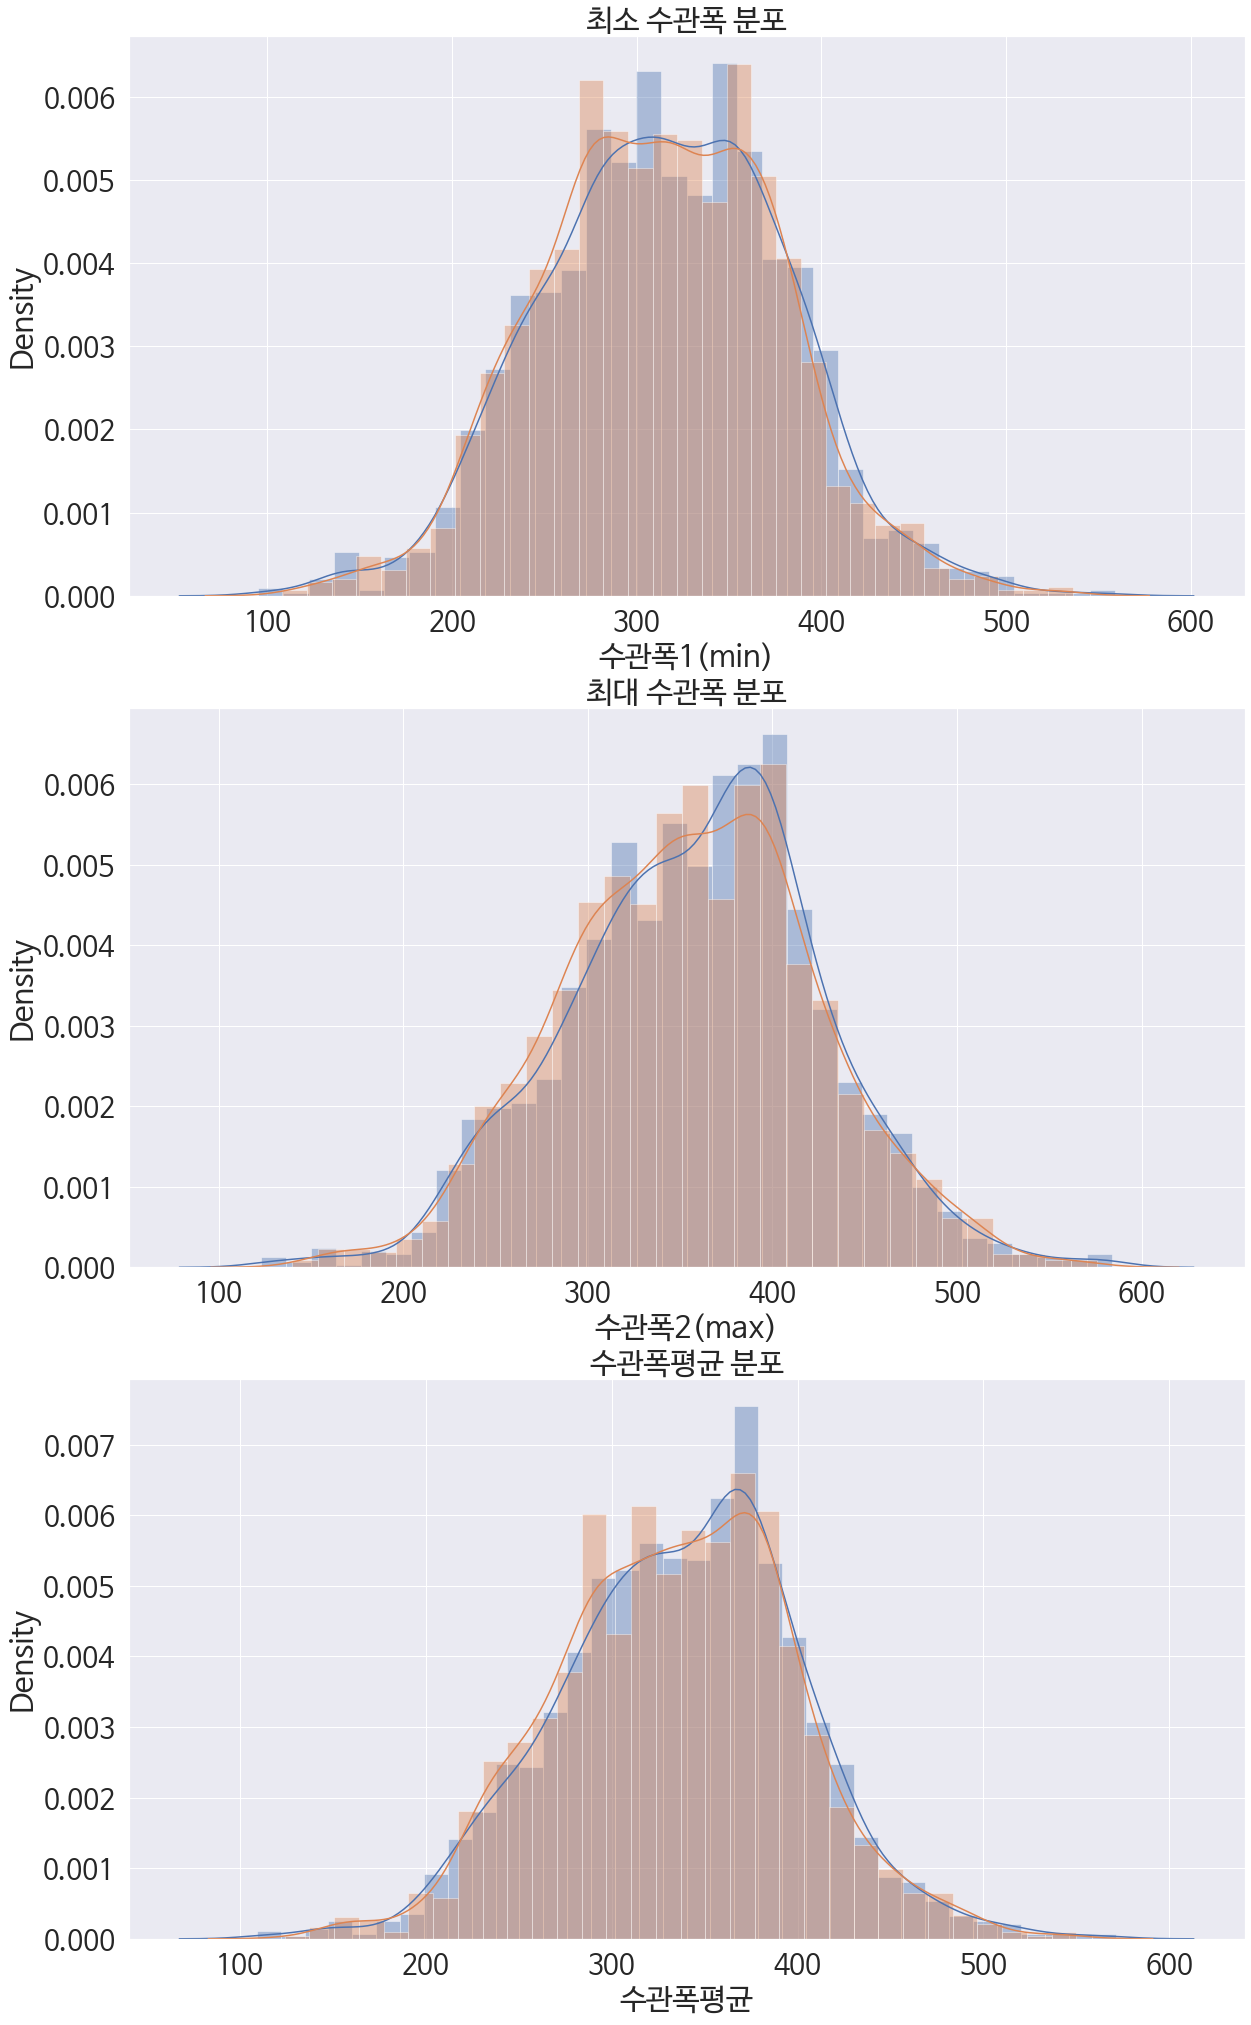

In [ ]:
f, ax = plt.subplots(3, 1, figsize = (20, 35))
sns.distplot(df_train['수관폭1(min)'], ax = ax[0])
sns.distplot(df_test['수관폭1(min)'], ax = ax [0])
ax[0].set_title('최소 수관폭 분포')

sns.distplot(df_train['수관폭2(max)'], ax = ax[1])
sns.distplot(df_test['수관폭2(max)'], ax = ax [1])
ax[1].set_title('최대 수관폭 분포')

sns.distplot(df_train['수관폭평균'], ax = ax[2])
sns.distplot(df_test['수관폭평균'], ax = ax [2])
ax[2].set_title('수관폭평균 분포')

* 수관폭 관련 변수들은 train과 test에서 비슷한 분포를 가지고 있다.

Text(0.5, 1.0, '최소 수관폭과 최대 수관폭 분포 - test')

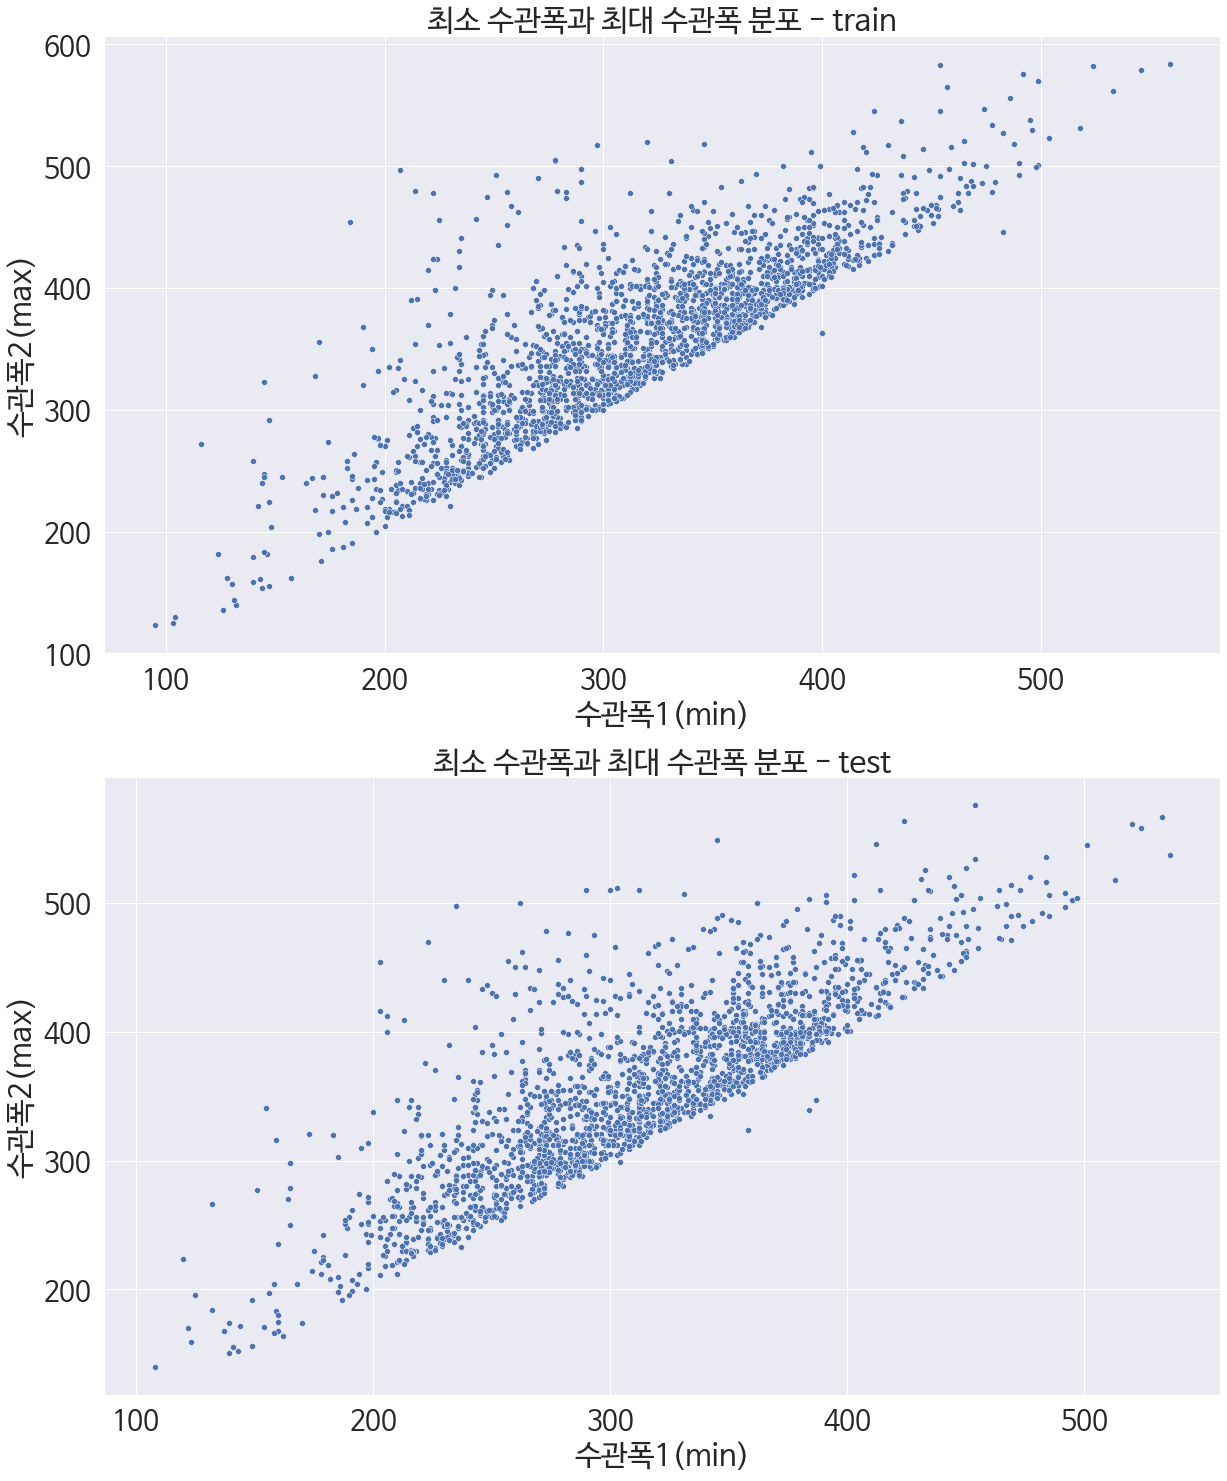

In [ ]:
f, ax = plt.subplots(2, 1, figsize = (20, 25))
sns.scatterplot(data = df_train, x = '수관폭1(min)', y = '수관폭2(max)', ax = ax[0])
ax[0].set_title('최소 수관폭과 최대 수관폭 분포 - train')

sns.scatterplot(data = df_test, x = '수관폭1(min)', y = '수관폭2(max)', ax = ax[1])
ax[1].set_title('최소 수관폭과 최대 수관폭 분포 - test')

* 대체로 수관폭이 줄어들지는 않는다.
* 급격하게 수관폭이 늘어난 경우도 있다.

In [ ]:
df_train[df_train['수관폭1(min)'] > df_train['수관폭2(max)']]

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
126,TRAIN_0126,768,229.0,400.0,363.0,381.5,2.6,2.6,2.6,2.6,...,65.228946,65.179986,65.158301,65.110052,64.925351,64.837783,64.771713,64.738701,64.554728,64.532767
934,TRAIN_0934,444,252.0,372.0,368.0,370.0,3.7,3.7,3.6,3.6,...,71.999308,71.869916,71.739457,71.692460,71.548675,71.436542,71.407985,71.212528,71.100173,71.097174
1483,TRAIN_1483,685,163.0,230.0,221.0,225.5,2.8,2.8,2.8,2.7,...,66.930895,66.929452,66.801114,66.623116,66.505390,66.414583,66.288522,66.156613,65.984881,65.960707
1525,TRAIN_1525,532,237.0,288.0,285.0,286.5,3.1,3.1,3.0,3.0,...,72.520749,72.489489,72.350987,72.226692,72.029765,71.910816,71.749405,71.725145,71.527852,71.434280
2061,TRAIN_2061,566,262.0,483.0,446.0,464.5,3.5,3.4,3.4,3.4,...,72.288672,72.282160,72.216008,72.094279,72.076552,72.018723,71.860993,71.775338,71.580013,71.405694


* 수관폭이 줄어든 경우 평균 이상의 착과량을 가지고 있다.

In [ ]:
df_test[df_test['수관폭1(min)'] > df_test['수관폭2(max)']]

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
50,TEST_0050,236.0,356.0,352.0,354.0,3.3,3.3,3.2,3.2,3.2,...,67.595282,67.456595,67.337653,67.329336,67.260344,67.223560,67.036608,66.940888,66.847217,66.774786
211,TEST_0211,249.0,387.0,347.0,367.0,4.6,4.5,4.5,4.4,4.4,...,71.066446,70.889094,70.789869,70.595271,70.536721,70.511854,70.317518,70.149538,70.014611,69.874447
397,TEST_0397,242.0,384.0,339.0,361.5,4.5,4.5,4.4,4.4,4.4,...,75.612965,75.542956,75.526513,75.356863,75.298320,75.110001,74.953018,74.943339,74.789539,74.648537
509,TEST_0509,247.0,342.0,335.0,338.5,4.2,4.2,4.1,4.1,4.1,...,70.687948,70.589972,70.561825,70.447949,70.379007,70.339241,70.167105,70.077555,69.919603,69.825692
884,TEST_0884,206.0,358.0,324.0,341.0,3.5,3.4,3.4,3.4,3.3,...,71.094304,70.971419,70.882463,70.724235,70.627418,70.515733,70.316907,70.255824,70.207563,70.094811
992,TEST_0992,197.0,304.0,299.0,301.5,4.5,4.4,4.4,4.3,4.3,...,67.942421,67.889913,67.791861,67.675119,67.551364,67.509358,67.502220,67.336038,67.297158,67.119043
1244,TEST_1244,183.0,237.0,233.0,235.0,2.9,2.8,2.8,2.8,2.8,...,79.741611,79.594288,79.470797,79.322030,79.272175,79.106186,78.922685,78.722807,78.579438,78.420842


Text(0.5, 1.0, '최소 수관폭과 수관폭평균 분포 - test')

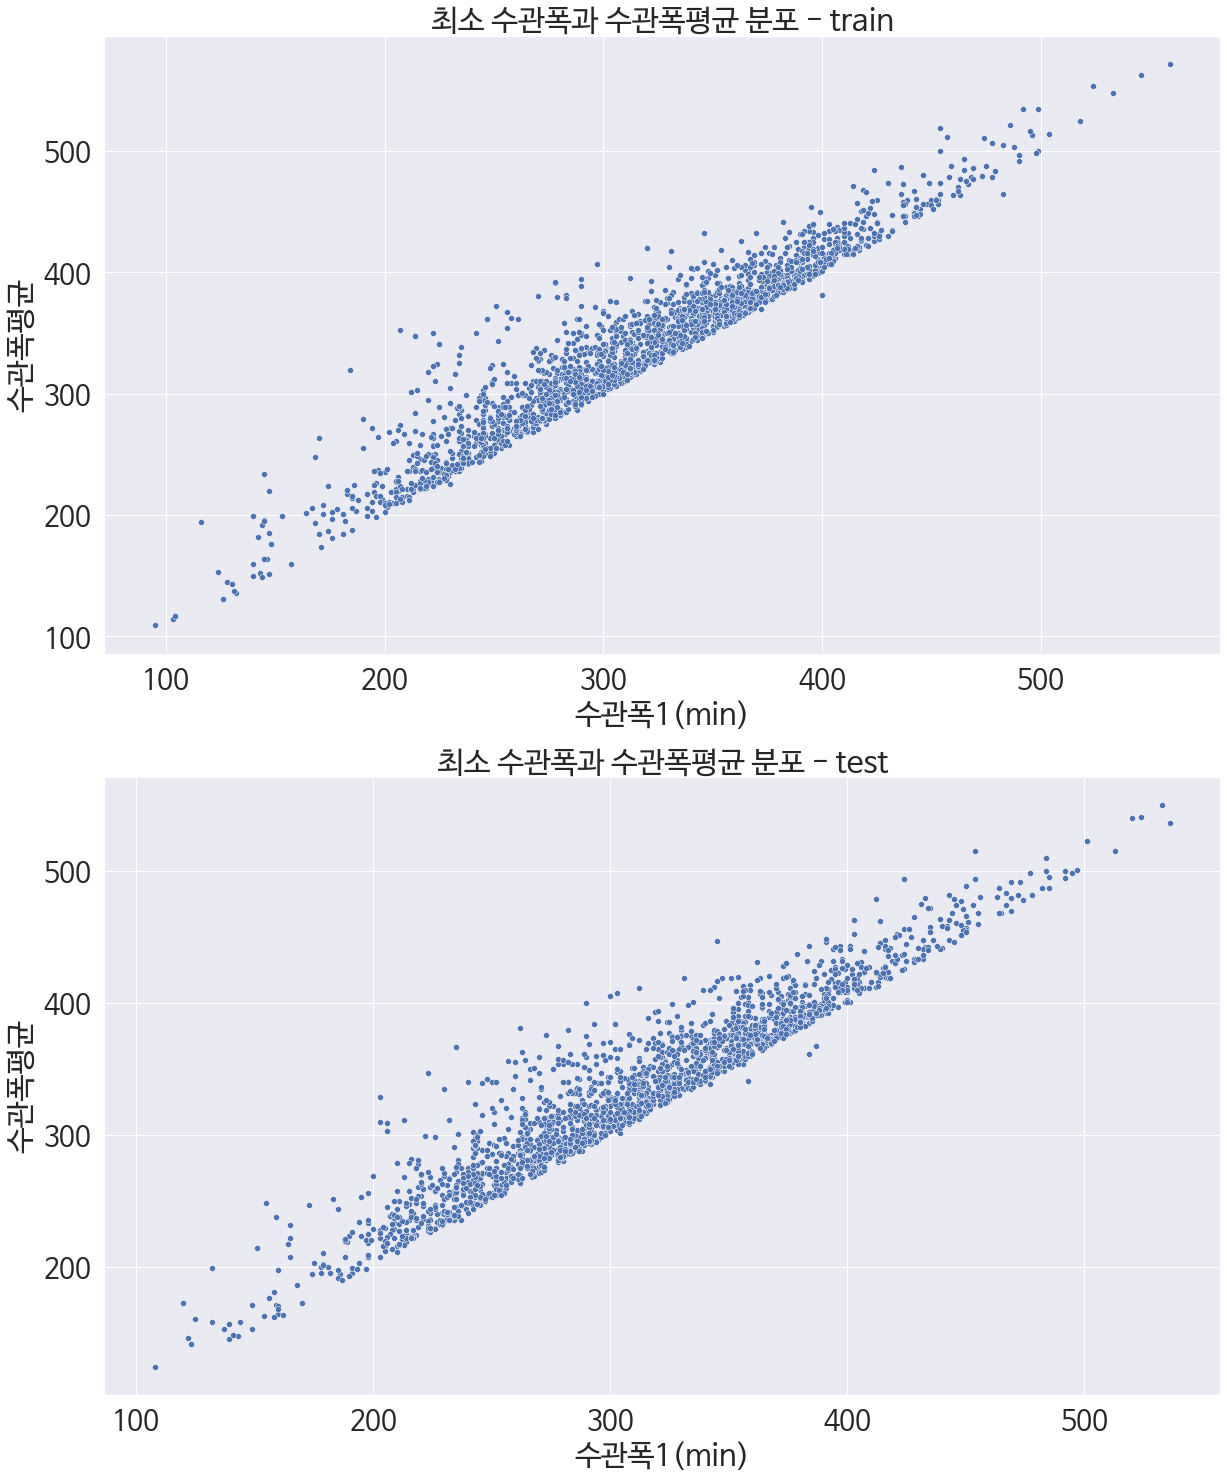

In [ ]:
f, ax = plt.subplots(2, 1, figsize = (20, 25))
sns.scatterplot(data = df_train, x = '수관폭1(min)', y = '수관폭평균', ax = ax[0])
ax[0].set_title('최소 수관폭과 수관폭평균 분포 - train')

sns.scatterplot(data = df_test, x = '수관폭1(min)', y = '수관폭평균', ax = ax[1])
ax[1].set_title('최소 수관폭과 수관폭평균 분포 - test')

Text(0.5, 1.0, '최대 수관폭과 수관폭평균 분포 - test')

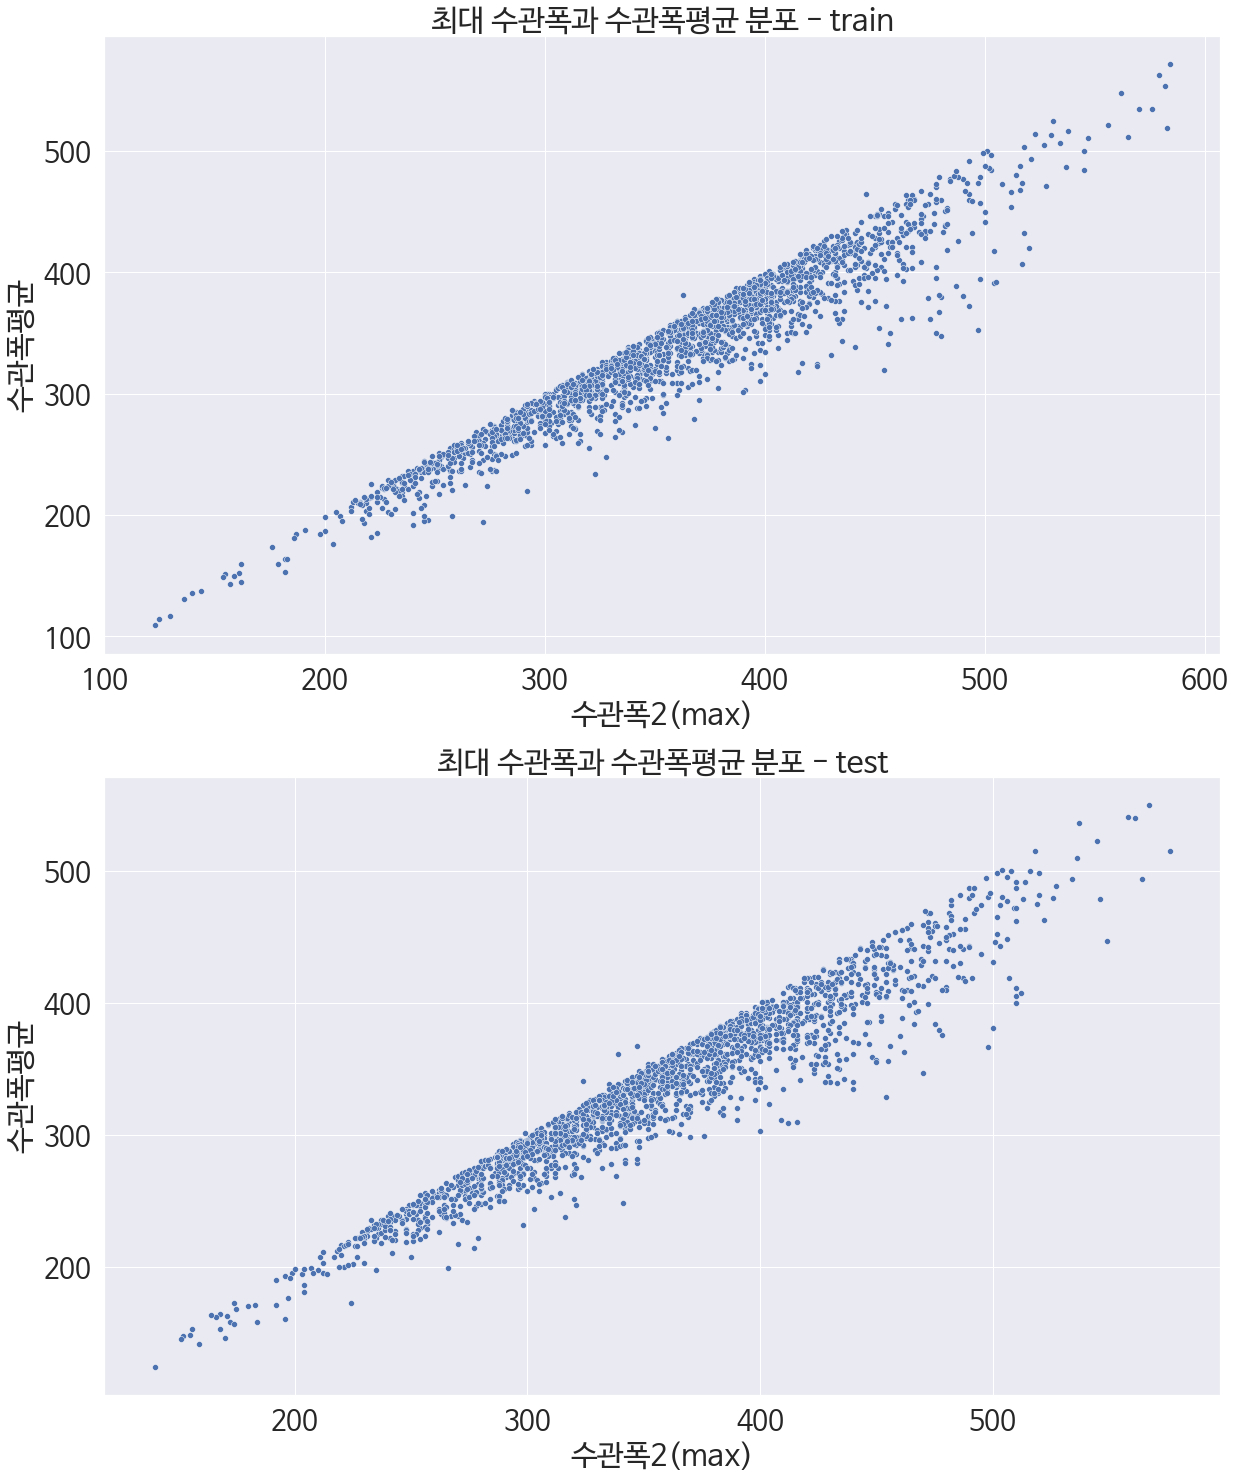

In [ ]:
f, ax = plt.subplots(2, 1, figsize = (20, 25))
sns.scatterplot(data = df_train, x = '수관폭2(max)', y = '수관폭평균', ax = ax[0])
ax[0].set_title('최대 수관폭과 수관폭평균 분포 - train')

sns.scatterplot(data = df_test, x = '수관폭2(max)', y = '수관폭평균', ax = ax[1])
ax[1].set_title('최대 수관폭과 수관폭평균 분포 - test')

Text(0.5, 1.0, '수관폭 평균에 따른 착과량 분포')

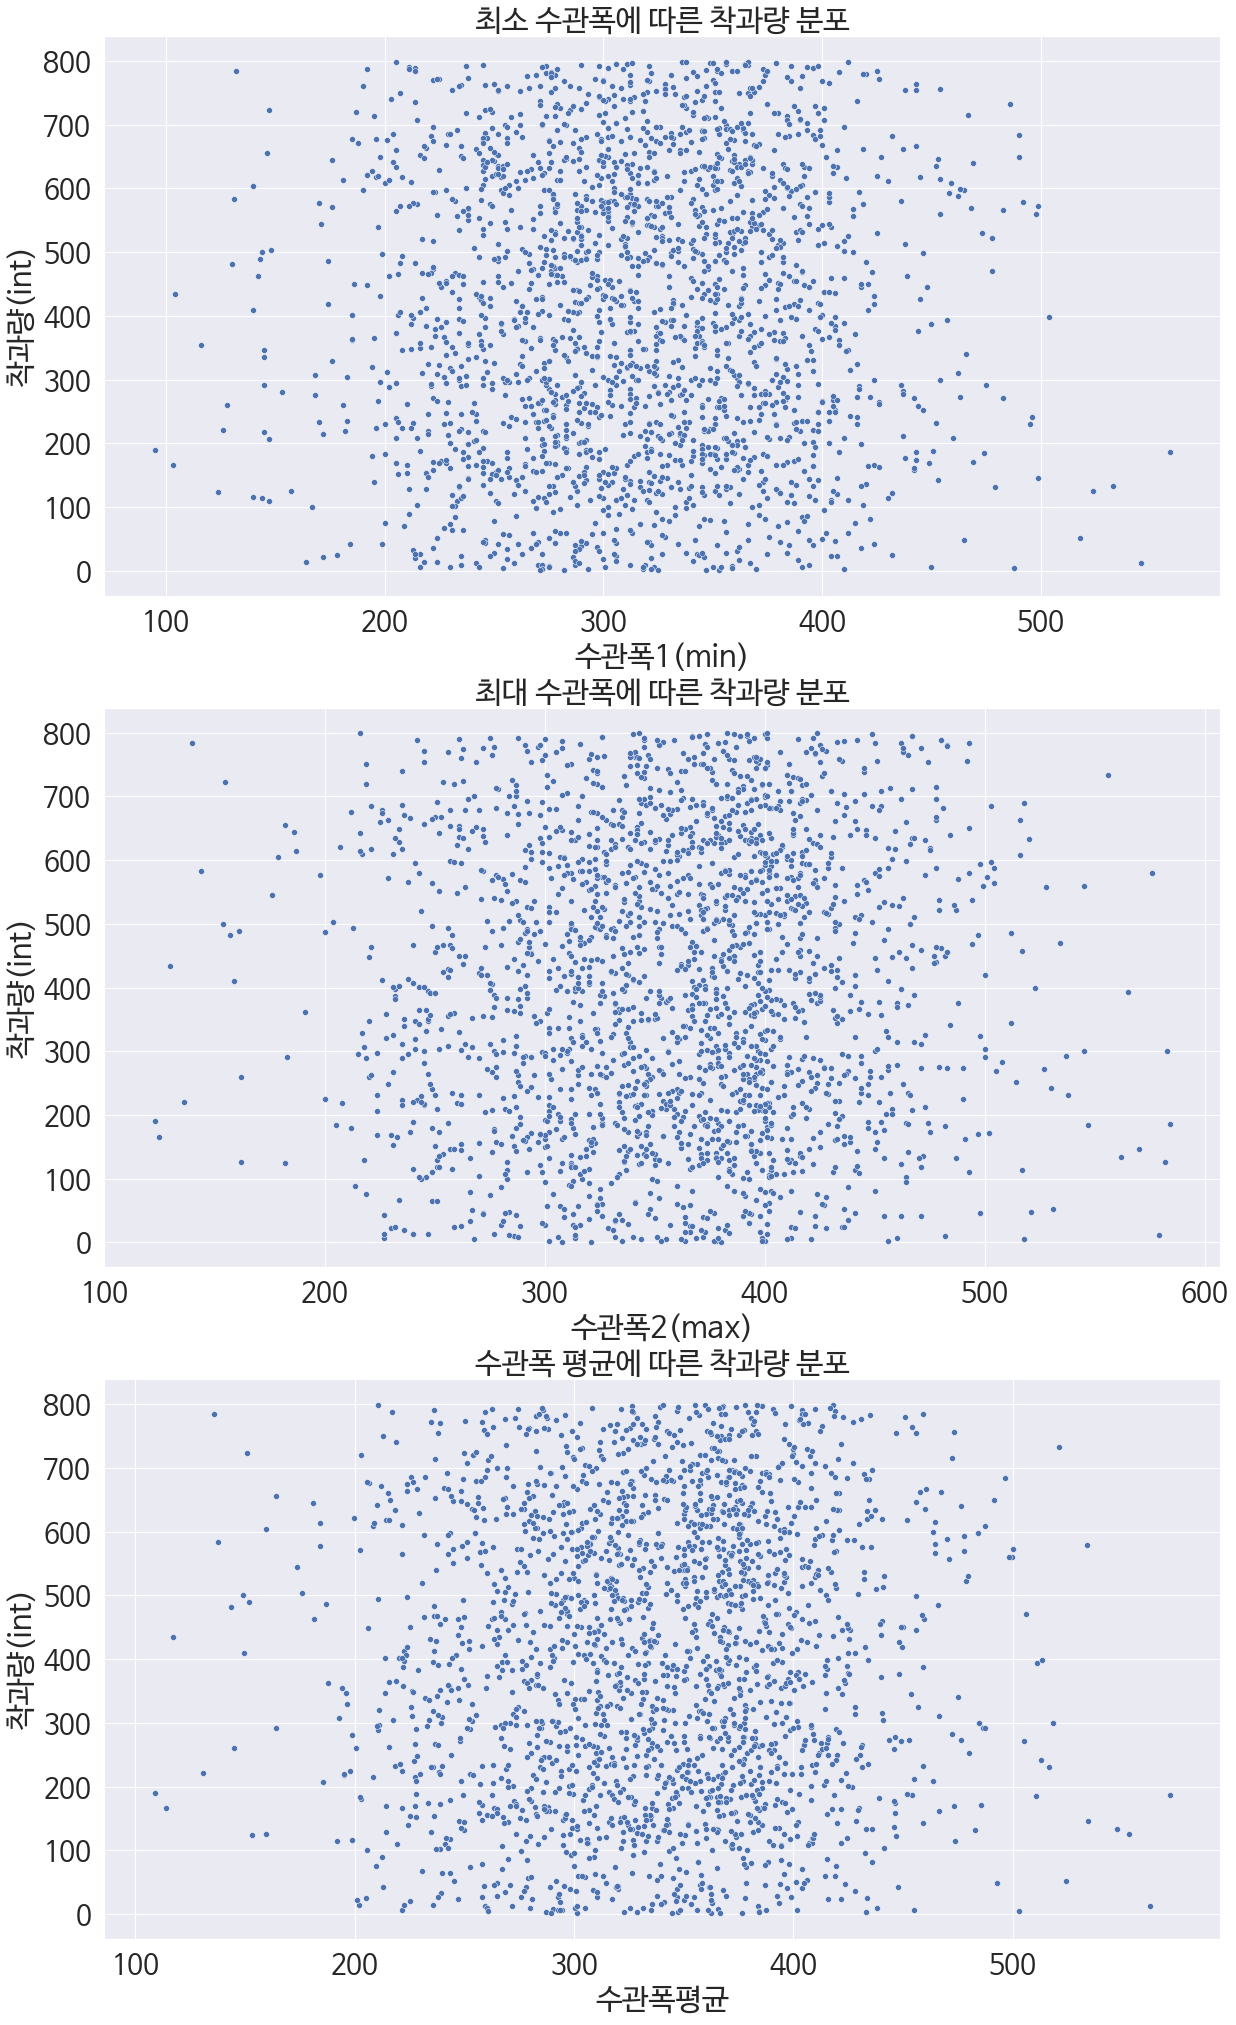

In [ ]:
f, ax = plt.subplots(3, 1, figsize = (20, 35))
sns.scatterplot(data = df_train, x = '수관폭1(min)', y = '착과량(int)', ax = ax[0])
ax[0].set_title('최소 수관폭에 따른 착과량 분포')

sns.scatterplot(data = df_train, x = '수관폭2(max)', y = '착과량(int)', ax = ax[1])
ax[1].set_title('최대 수관폭에 따른 착과량 분포')

sns.scatterplot(data = df_train, x = '수관폭평균', y = '착과량(int)', ax = ax[2])
ax[2].set_title('수관폭 평균에 따른 착과량 분포')

* 수관폭과 착과량 사이에도 특별한 상관관계는 없어보인다.

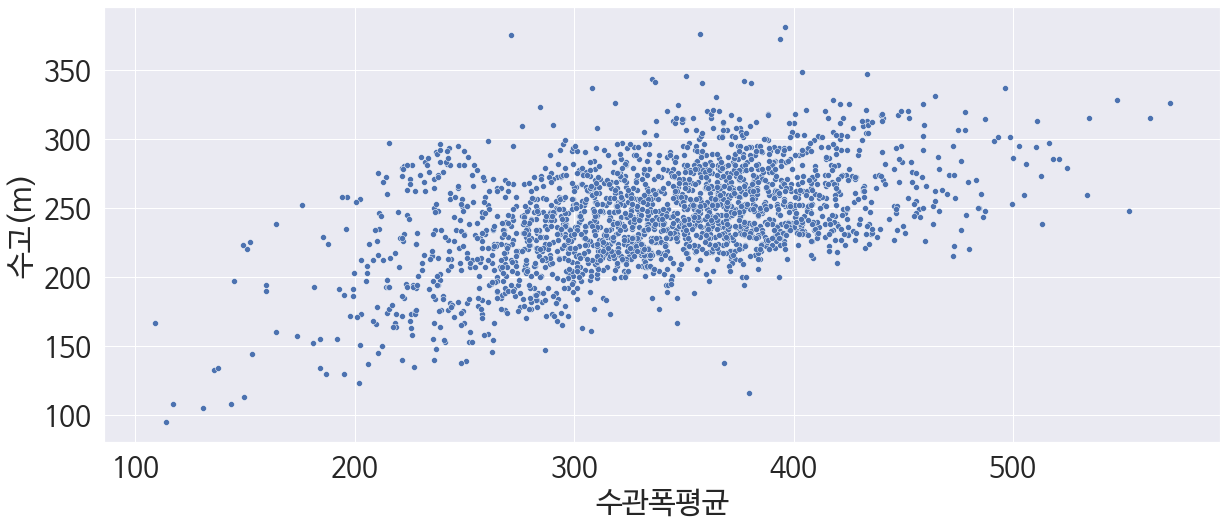

In [ ]:
plt.figure(figsize = (20,8))
sns.scatterplot(data = df_train, x = '수관폭평균', y = '수고(m)')

* 보통 수관폭이 커질수록 수고도 커진다.

## 3.3 새순

In [ ]:
# 새순 데이터(train)
df_train_sprout = df_train.iloc[: , 6:95]
df_train_sprout

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,...,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6
1,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,...,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0,0.0,0.0
2,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,2.7,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
3,3.1,3.0,3.0,3.0,3.0,2.9,2.9,2.9,2.8,2.8,...,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7
4,3.7,3.6,3.6,3.6,3.5,3.5,3.5,3.4,3.4,3.3,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,4.7,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.2,4.2,...,0.8,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0
2203,3.1,3.0,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6
2204,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
2205,3.9,3.9,3.8,3.8,3.8,3.7,3.7,3.6,3.6,3.6,...,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.5,0.0


In [ ]:
# 새순 데이터(test)
df_test_sprout = df_test.iloc[: , 5:94]
df_test_sprout

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,4.3,4.2,4.2,4.1,4.1,4.1,4.0,4.0,3.9,3.9,...,0.8,0.8,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0
1,2.5,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.4,2.4,...,0.8,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6
2,4.7,4.7,4.6,4.6,4.5,4.5,4.4,4.4,4.3,4.3,...,0.9,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0
3,3.6,3.6,3.6,3.6,3.5,3.5,3.4,3.4,3.4,3.3,...,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.6,0.5,0.0
4,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,2.5,2.5,...,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2.5,2.5,2.4,2.4,2.4,2.4,2.3,2.3,2.3,2.3,...,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6
2204,4.1,4.1,4.1,4.0,4.0,3.9,3.9,3.8,3.8,3.7,...,0.8,0.8,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0
2205,3.8,3.8,3.8,3.7,3.7,3.7,3.6,3.6,3.5,3.5,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6
2206,4.5,4.4,4.4,4.3,4.3,4.2,4.2,4.2,4.1,4.1,...,0.9,0.8,0.8,0.7,0.7,0.7,0.6,0.5,0.0,0.0


In [ ]:
print(df_train['2022-09-01 새순'].sort_values())
print(df_train['2022-11-28 새순'].sort_values())

2126    2.3
86      2.3
1551    2.3
511     2.3
945     2.3
       ... 
2167    5.3
1913    5.3
1510    5.3
1910    5.3
2206    5.3
Name: 2022-09-01 새순, Length: 2207, dtype: float64
2206    0.0
1706    0.0
841     0.0
842     0.0
1704    0.0
       ... 
539     0.8
2015    0.8
1279    0.8
1612    0.8
309     0.9
Name: 2022-11-28 새순, Length: 2207, dtype: float64


In [ ]:
print(df_test['2022-09-01 새순'].sort_values())
print(df_test['2022-11-28 새순'].sort_values())

1410    2.3
872     2.3
1449    2.3
582     2.3
824     2.3
       ... 
1848    5.3
623     5.4
1844    5.4
336     5.4
390     5.4
Name: 2022-09-01 새순, Length: 2208, dtype: float64
0       0.0
1186    0.0
1185    0.0
1180    0.0
1179    0.0
       ... 
713     0.8
1628    0.8
851     0.8
1581    0.8
2127    0.8
Name: 2022-11-28 새순, Length: 2208, dtype: float64


* 새순은 9월부터 11월까지 점차 감소한다.

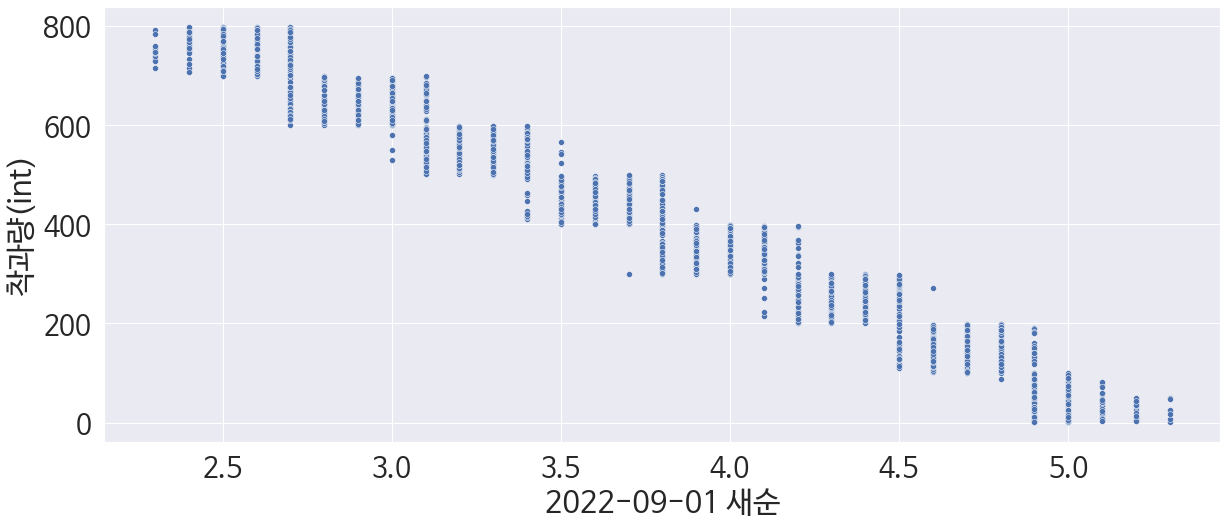

In [ ]:
plt.figure(figsize = (20,8))
sns.scatterplot(data = df_train, x = '2022-09-01 새순', y = '착과량(int)')

* 9월 초 대체로 새순이 크면 착과량이 적고 새순이 작으면 착과량이 많다.

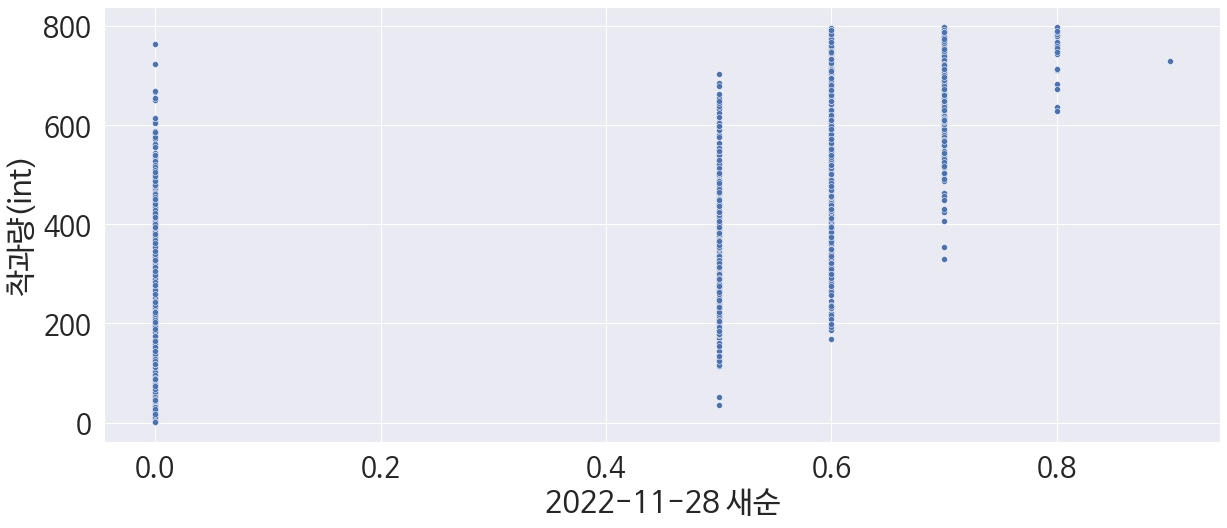

In [ ]:
plt.figure(figsize = (20,8))
sns.scatterplot(data = df_train, x = '2022-11-28 새순', y = '착과량(int)')

* 11월 말 새순의 크기는 크게 상관이 없는 것 같다.
* 9월 초 새순이 얼마나 큰지에 따라 착과량이 결정되는 것 같다.

## 3.4 엽록소

# 4. 모델링

## 4.1 새순 관련 변수 추가

In [41]:
# 새순 차이 변수 생성
df_train['새순 차이'] = df_train['2022-11-28 새순'] - df_train['2022-09-01 새순']
df_test['새순 차이'] = df_test['2022-11-28 새순'] - df_test['2022-09-01 새순']

# 새순 합, 평균 변수 생성
df_train['새순 합'] = 0
for i in range(6, 95):
    df_train['새순 합'] += df_train.iloc[:, i]

df_train['새순 평균'] = df_train['새순 합'] / 89

df_test['새순 합'] = 0
for i in range(5, 94):
    df_test['새순 합'] += df_test.iloc[:, i]

df_test['새순 평균'] = df_test['새순 합'] / 89

## 4.2 랜덤 포레스트

In [42]:
X_train = df_train.drop(['ID','착과량(int)'], axis=1)
y_train = df_train['착과량(int)']
X_test = df_test.drop(['ID'], axis = 1)

In [63]:
# 적절한 파라미터 찾기
hyper_parameter = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [4, 5]
}

model = RandomForestRegressor()

hyper_parameter_tuner = GridSearchCV(model, hyper_parameter, cv = 5)
hyper_parameter_tuner.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5], 'n_estimators': [100, 200, 300]})

In [64]:
 hyper_parameter_tuner.best_params_

{'max_depth': 5, 'n_estimators': 300}

In [65]:
model = RandomForestRegressor(n_estimators = 300, max_depth = 5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=300)

In [66]:
pred = model.predict(X_test)
pred

array([247.75785722, 755.06456544, 152.35891607, ..., 360.06829616,
       242.82647396, 105.26911859])

In [67]:
importances = model.feature_importances_

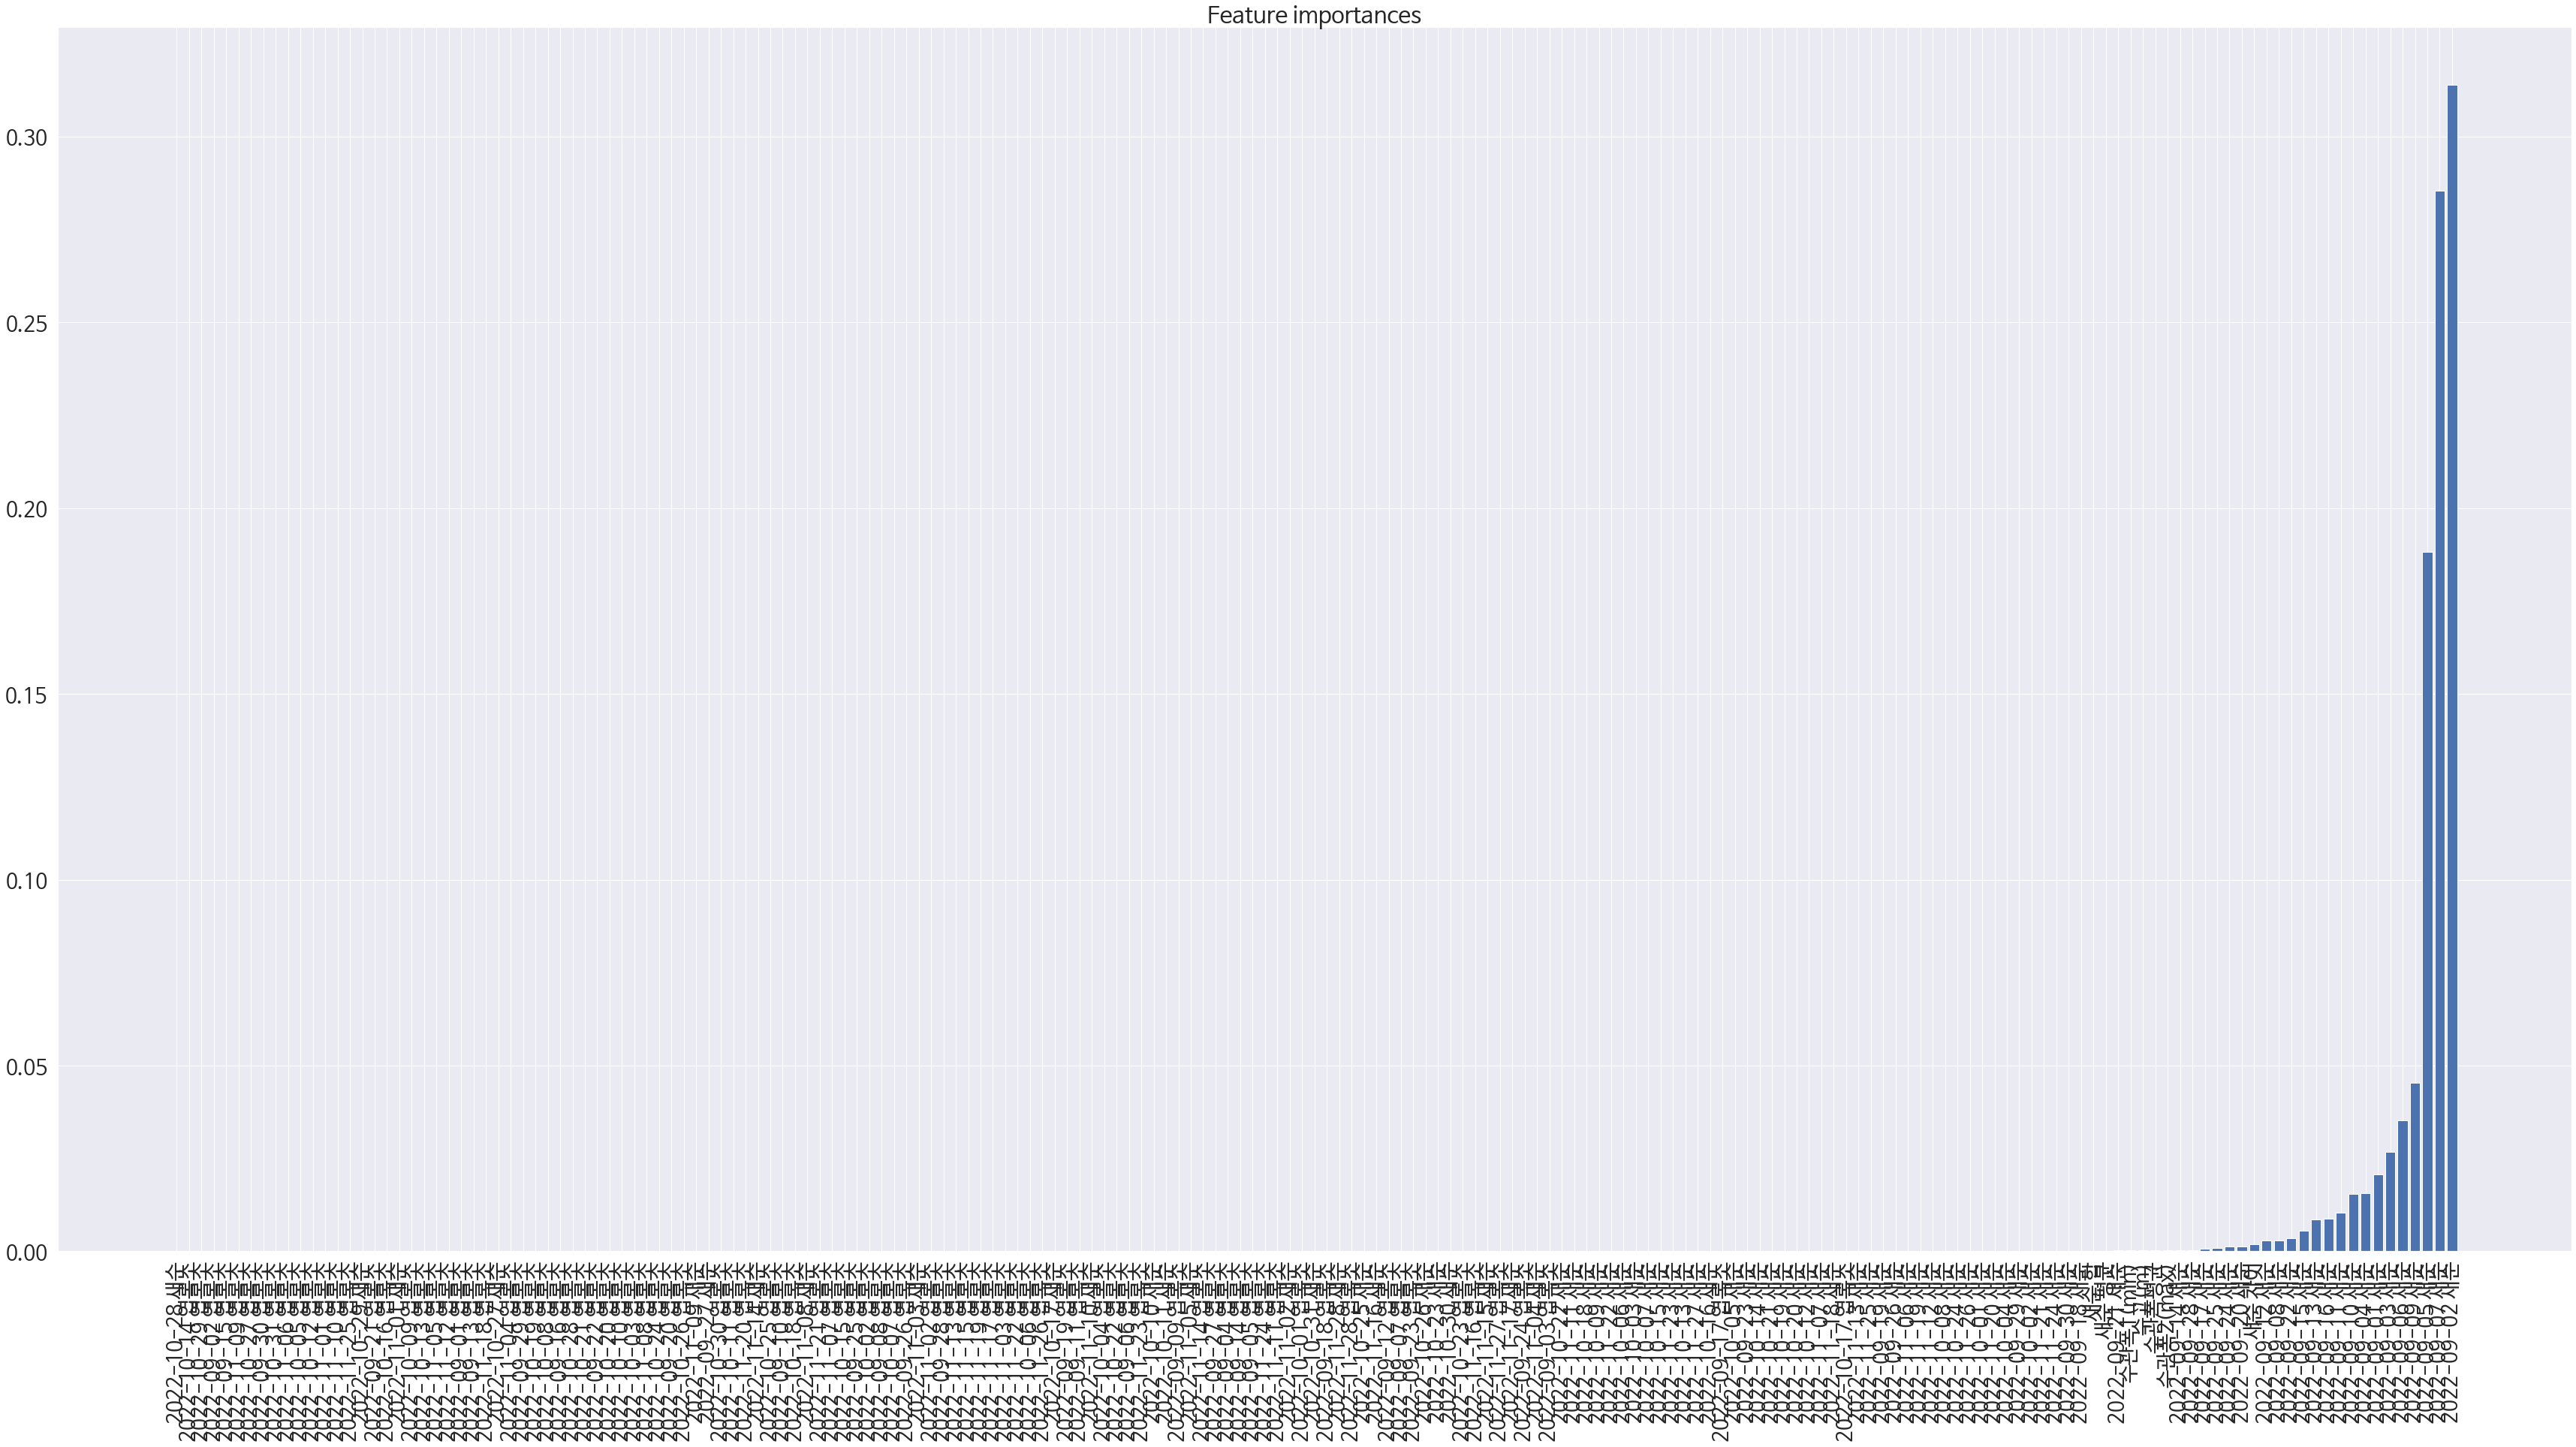

In [68]:
indices_sorted = np.argsort(importances)

plt.figure(figsize = (60,30))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X_train.columns[indices_sorted], rotation=90)
plt.show()

In [69]:
list(X_train.columns[indices_sorted])

['2022-10-28 새순',
 '2022-10-14 엽록소',
 '2022-10-29 엽록소',
 '2022-09-02 엽록소',
 '2022-09-15 엽록소',
 '2022-11-09 엽록소',
 '2022-10-27 엽록소',
 '2022-09-30 엽록소',
 '2022-10-31 엽록소',
 '2022-11-06 엽록소',
 '2022-10-05 엽록소',
 '2022-10-12 엽록소',
 '2022-11-01 엽록소',
 '2022-11-10 엽록소',
 '2022-11-25 엽록소',
 '2022-10-29 새순',
 '2022-09-21 엽록소',
 '2022-10-16 엽록소',
 '2022-11-01 새순',
 '2022-10-09 엽록소',
 '2022-10-13 엽록소',
 '2022-11-05 엽록소',
 '2022-11-12 엽록소',
 '2022-09-01 엽록소',
 '2022-09-13 엽록소',
 '2022-11-18 엽록소',
 '2022-10-27 새순',
 '2022-11-04 엽록소',
 '2022-09-29 엽록소',
 '2022-10-19 엽록소',
 '2022-10-08 엽록소',
 '2022-09-16 엽록소',
 '2022-10-28 엽록소',
 '2022-10-21 엽록소',
 '2022-09-22 엽록소',
 '2022-10-20 엽록소',
 '2022-10-10 엽록소',
 '2022-10-03 엽록소',
 '2022-11-08 엽록소',
 '2022-10-24 엽록소',
 '2022-09-20 엽록소',
 '2022-10-26 엽록소',
 '2022-11-09 새순',
 '2022-09-27 새순',
 '2022-10-30 엽록소',
 '2022-10-11 엽록소',
 '2022-11-20 엽록소',
 '2022-11-14 새순',
 '2022-10-25 엽록소',
 '2022-09-10 엽록소',
 '2022-10-18 엽록소',
 '2022-11-08 새순',
 '2022-11-21 엽록소',
 

In [70]:
sub['착과량(int)'] = pred
sub.to_csv('/content/drive/MyDrive/data/감귤/sample_submission.csv', index=False)

In [71]:
sub

,ID,착과량(int)
0,TEST_0000,247.757857
1,TEST_0001,755.064565
2,TEST_0002,152.358916
3,TEST_0003,449.950732
4,TEST_0004,685.859896
...,...,...
2203,TEST_2203,755.433596
2204,TEST_2204,339.909764
2205,TEST_2205,360.068296
2206,TEST_2206,242.826474


# 참고 코드

In [ ]:
# 유형별 변수 정리
target = ['착과량(int)'] # 예측해야 할 변수
sprout = list(df_train.columns[6:95]) # 새순 변수 - 시계열
chlorophyll = list(df_train.columns[95:]) # 엽록소 변수 - 시계열
others = list(df_train.columns[2:6]) # 그 외 변수들 - 수고, 수관폭 변수

print(target)
print(sprout)
print(chlorophyll)
print(others)

['착과량(int)']
['2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순', '2022-09-05 새순', '2022-09-06 새순', '2022-09-07 새순', '2022-09-08 새순', '2022-09-09 새순', '2022-09-10 새순', '2022-09-11 새순', '2022-09-12 새순', '2022-09-13 새순', '2022-09-14 새순', '2022-09-15 새순', '2022-09-16 새순', '2022-09-17 새순', '2022-09-18 새순', '2022-09-19 새순', '2022-09-20 새순', '2022-09-21 새순', '2022-09-22 새순', '2022-09-23 새순', '2022-09-24 새순', '2022-09-25 새순', '2022-09-26 새순', '2022-09-27 새순', '2022-09-28 새순', '2022-09-29 새순', '2022-09-30 새순', '2022-10-01 새순', '2022-10-02 새순', '2022-10-03 새순', '2022-10-04 새순', '2022-10-05 새순', '2022-10-06 새순', '2022-10-07 새순', '2022-10-08 새순', '2022-10-09 새순', '2022-10-10 새순', '2022-10-11 새순', '2022-10-12 새순', '2022-10-13 새순', '2022-10-14 새순', '2022-10-15 새순', '2022-10-16 새순', '2022-10-17 새순', '2022-10-18 새순', '2022-10-19 새순', '2022-10-20 새순', '2022-10-21 새순', '2022-10-22 새순', '2022-10-23 새순', '2022-10-24 새순', '2022-10-25 새순', '2022-10-26 새순', '2022-10-27 새순', '2022-10-28 새순', 

In [ ]:
# 시계열 변수들 melt 작업을 통해 하나의 데이터 값으로 변경
train_melt = df_train.melt(id_vars=['ID'] + target + others, value_vars = sprout + chlorophyll)
test_melt = df_test.melt(id_vars=['ID'] + others, value_vars = sprout + chlorophyll)

# 날짜와 새순/엽록소 분리해서 변수 생성
train_melt['date'] = train_melt['variable'].map(lambda x : str(x.split(' ')[0]))
train_melt['type'] = train_melt['variable'].map(lambda x : str(x.split(' ')[1]))

test_melt['date'] = test_melt['variable'].map(lambda x : str(x.split(' ')[0]))
test_melt['type'] = test_melt['variable'].map(lambda x : str(x.split(' ')[1]))

In [ ]:
train_melt

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,variable,value,date,type
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2022-09-01 새순,2.800000,2022-09-01,새순
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,2022-09-01 새순,3.300000,2022-09-01,새순
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,2022-09-01 새순,3.000000,2022-09-01,새순
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,2022-09-01 새순,3.100000,2022-09-01,새순
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,2022-09-01 새순,3.700000,2022-09-01,새순
...,...,...,...,...,...,...,...,...,...,...
392841,TRAIN_2202,119,230.0,353.0,367.0,360.0,2022-11-28 엽록소,65.560547,2022-11-28,엽록소
392842,TRAIN_2203,611,266.0,337.0,400.0,368.5,2022-11-28 엽록소,72.944396,2022-11-28,엽록소
392843,TRAIN_2204,650,237.0,353.0,362.0,357.5,2022-11-28 엽록소,66.479459,2022-11-28,엽록소
392844,TRAIN_2205,363,281.0,337.0,403.0,370.0,2022-11-28 엽록소,65.812084,2022-11-28,엽록소


In [ ]:
test_melt

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,variable,value,date,type
0,TEST_0000,231.0,219.0,302.0,260.5,2022-09-01 새순,4.300000,2022-09-01,새순
1,TEST_0001,206.0,324.0,346.0,335.0,2022-09-01 새순,2.500000,2022-09-01,새순
2,TEST_0002,282.0,373.0,404.0,388.5,2022-09-01 새순,4.700000,2022-09-01,새순
3,TEST_0003,234.0,337.0,357.0,347.0,2022-09-01 새순,3.600000,2022-09-01,새순
4,TEST_0004,222.0,329.0,347.0,338.0,2022-09-01 새순,2.700000,2022-09-01,새순
...,...,...,...,...,...,...,...,...,...
393019,TEST_2203,217.0,265.0,288.0,276.5,2022-11-28 엽록소,69.601365,2022-11-28,엽록소
393020,TEST_2204,182.0,191.0,262.0,226.5,2022-11-28 엽록소,65.632342,2022-11-28,엽록소
393021,TEST_2205,254.0,280.0,332.0,306.0,2022-11-28 엽록소,62.307955,2022-11-28,엽록소
393022,TEST_2206,257.0,285.0,297.0,291.0,2022-11-28 엽록소,63.343589,2022-11-28,엽록소
